# Kicking Horses

A famous early  application of low-number statistics was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898.

He studied the distribution of 122 men kicked to death by horses among 10 Prussian army corps within 20 years (so a total number of corpes of 200). He recorded the number of corps with a given number of deaths:

| Number of deaths | Number of groups |
| --- | --- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

- Plot the resulting probability distribution. Careful with the normalization
- How does it look like? Again try to fit it by hand.

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

In [2]:
deaths = np.array([0, 1, 2, 3, 4])
groups = np.array([109, 65, 22, 3, 1])

corpses = 200

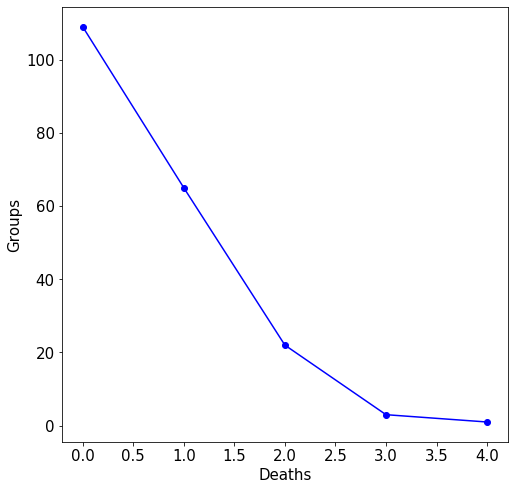

In [5]:
plt.scatter(deaths, groups, color='b')
plt.plot(deaths, groups, color='b')
plt.xlabel("Deaths")
plt.ylabel("Groups")
plt.show()

I find the weighted mean.

In [12]:
#I compute the fraction of groups
f = groups/corpses
print("The fraction of gropus are:", f)

mu = np.average(deaths, weights=f)
print("The weighted mean is:", round(mu, 2))

The fraction of gropus are: [0.545 0.325 0.11  0.015 0.005]
The weighted mean is: 0.61


I plot the possible probability distributions, in order to find the one which fits best with our data.

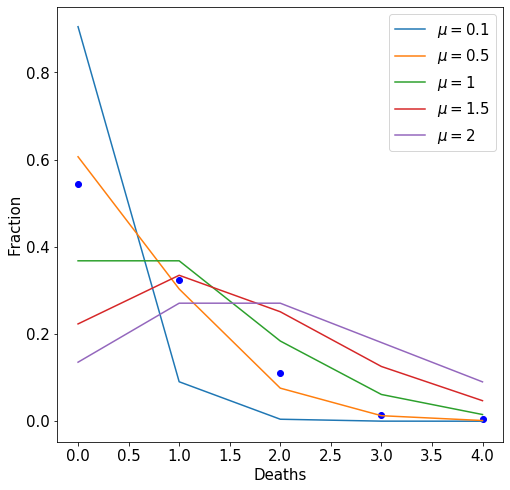

In [13]:
plt.scatter(deaths, f, color='b')
plt.xlabel("Deaths")
plt.ylabel("Fraction")

for i in [0.1, 0.5, 1, 1.5, 2]:
    p = scipy.stats.poisson(i).pmf(deaths)
    plt.plot(deaths, p, label='$\mu='+str(i)+"$")
    plt.legend()

Now I plot the data distribution and the Poissonian distribution which better fit our data.

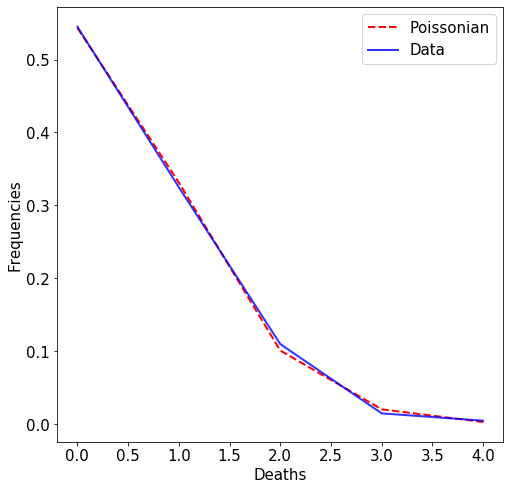

In [15]:
poiss = scipy.stats.poisson(mu).pmf(deaths) #poissonian with the weighted mean
plt.plot(deaths, poiss, c='r', lw=2, ls='--', label="Poissonian")
plt.plot(deaths, f, color='b', lw=2, alpha=0.8, label="Data")
plt.legend()
plt.xlabel("Deaths")
plt.ylabel("Frequencies")
plt.show()

From this plot I observe that the distribution fit quite well the data.